In [1]:
# Data Collection
import nltk 
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd 
import tensorflow as tf

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\yogit\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
# Load the dataset
data = gutenberg.raw('shakespeare-hamlet.txt')    

# Save the dataset in a text file
with open('hamlet.txt', 'w') as file:
    file.write(data)
    

In [4]:
# Data Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [5]:
# Load the dataset
with open('hamlet.txt', 'r') as file:
    text = file.read().lower()


In [6]:
# tokenize the text creating indexes for words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
total_words

4818

In [7]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [8]:
# create input sequences and labels
input_sequence = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        in_seq = token_list[:i+1]
        input_sequence.append(in_seq)
        
        
input_sequence

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [9]:
# Pad Sequence
max_sequence_len = max([len(x) for x in input_sequence])
print(f'max_sequence_len: {max_sequence_len}') # max_sequence_len)
input_sequence = np.array(pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre'))
print(f'input_sequence: {input_sequence}')
print(f'input_sequence.shape: {input_sequence.shape}')


max_sequence_len: 14
input_sequence: [[   0    0    0 ...    0    1  687]
 [   0    0    0 ...    1  687    4]
 [   0    0    0 ...  687    4   45]
 ...
 [   0    0    0 ...    4   45 1047]
 [   0    0    0 ...   45 1047    4]
 [   0    0    0 ... 1047    4  193]]
input_sequence.shape: (25732, 14)


In [10]:
# create predictor and target labels
predictors, label = input_sequence[:,:-1], input_sequence[:,-1]
print(f'predictors: {predictors}')
print(f'label: {label}')
print(f'predictors.shape: {predictors.shape}')
print(f'label.shape: {label.shape}')

predictors: [[   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    1  687]
 [   0    0    0 ...    1  687    4]
 ...
 [   0    0    0 ...  687    4   45]
 [   0    0    0 ...    4   45 1047]
 [   0    0    0 ...   45 1047    4]]
label: [ 687    4   45 ... 1047    4  193]
predictors.shape: (25732, 13)
label.shape: (25732,)


In [11]:
X = predictors
y = tf.keras.utils.to_categorical(label, num_classes = total_words)


In [18]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (17240, 13)
X_test shape: (8492, 13)
y_train shape: (17240, 4818)
y_test shape: (8492, 4818)


In [19]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 7, restore_best_weights = True)


In [20]:
# Train GRU model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout 
from tensorflow.keras.layers import BatchNormalization

# define the model
gru_model0 = Sequential()
gru_model0.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
gru_model0.add(GRU(128, return_sequences=True))
gru_model0.add(BatchNormalization())
gru_model0.add(Dropout(0.2))
gru_model0.add(GRU(128))
gru_model0.add(Dense(total_words, activation = 'softmax'))




In [22]:
from tensorflow.keras.optimizers import Adam
gru_model0.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# Train the model
history = gru_model0.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data = (X_test, y_test), verbose=1,callbacks = [early_stop])

Epoch 1/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.0304 - loss: 7.1267 - val_accuracy: 0.0511 - val_loss: 6.6288
Epoch 2/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.0591 - loss: 6.2115 - val_accuracy: 0.0684 - val_loss: 6.5825
Epoch 3/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.0945 - loss: 5.6383 - val_accuracy: 0.0743 - val_loss: 6.6518
Epoch 4/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.1185 - loss: 5.1203 - val_accuracy: 0.0764 - val_loss: 6.8011
Epoch 5/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.1685 - loss: 4.5809 - val_accuracy: 0.0727 - val_loss: 6.9049
Epoch 6/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.2237 - loss: 4.1032 - val_accuracy: 0.0708 - val_loss: 7.0738
Epoch 7/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 25s 47ms/step - accuracy: 0.2995 - loss: 3.6824 - val_accuracy: 0.0691 - val_loss: 7.2870
Epoch 8/50
539/539 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.3648 - loss: 3.2727 - 

In [25]:
gru_model0.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 13, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 13, 128)        │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4818)           │       621,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,873,168 (14.77 MB)

 Trainable params: 1,290,970 (4.92 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2,581,942 (9.85 MB)

In [26]:
gru_model0.evaluate(X_test, y_test)

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0696 - loss: 6.5549


[6.582502365112305, 0.06841733306646347]

<Figure size 640x480 with 0 Axes>

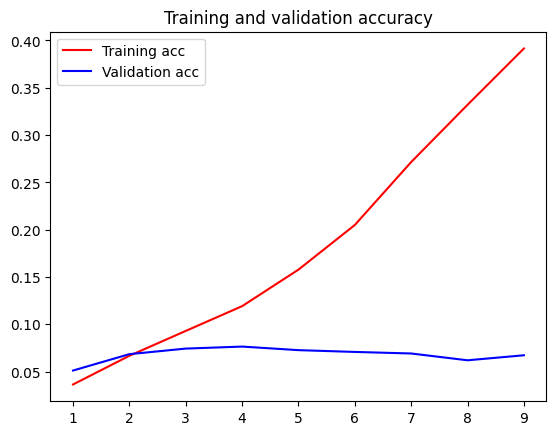

<Figure size 640x480 with 0 Axes>

In [27]:
# Ploting results
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

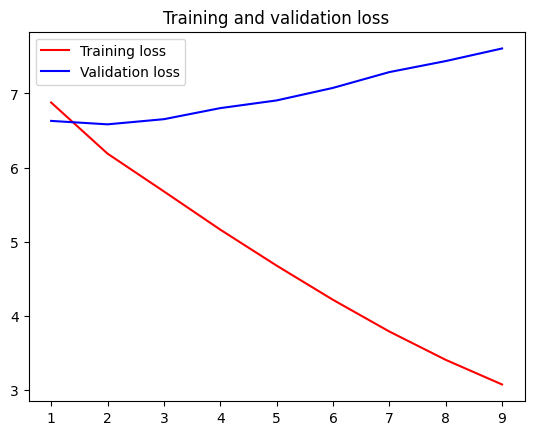

In [28]:
# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [31]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_len=gru_model0.input_shape[1]+1
next_word=predict_next_word(gru_model0,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:the


In [32]:
## Save the model
gru_model0.save("next_word_gru1.h5")
## Save the tokenizer
import pickle
with open('tokenizer1.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
input_text="  Enter Barnardo and Francisco two
print(f"Input text:{input_text}")
max_sequence_len=gru_model0.input_shape[1]+1
next_word=predict_next_word(gru_model0,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  You come most carefully vpon your
Next Word PRediction:father


## From above we can see that the model is overfitting. We need to use different scenario to get better accuracy. For example, we can use different model architecture

In [36]:
import numpy as np
import tensorflow as tf
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [37]:
# Load dataset
with open('hamlet.txt', 'r') as file:
    text = file.read().lower()
    

In [38]:
# Basic cleaning: remove punctuations
text = re.sub(r'[^\w\s]', '', text)
print(text)
#remove non-alphanumeric characters
text = re.sub(r'[^a-z\s]', ' ', text)
print(text)

the tragedie of hamlet by william shakespeare 1599


actus primus scoena prima

enter barnardo and francisco two centinels

  barnardo whos there
  fran nay answer me stand  vnfold
your selfe

   bar long liue the king

   fran barnardo
  bar he

   fran you come most carefully vpon your houre

   bar tis now strook twelue get thee to bed francisco

   fran for this releefe much thankes tis bitter cold
and i am sicke at heart

   barn haue you had quiet guard
  fran not a mouse stirring

   barn well goodnight if you do meet horatio and
marcellus the riuals of my watch bid them make hast
enter horatio and marcellus

  fran i thinke i heare them stand whos there
  hor friends to this ground

   mar and leigemen to the dane

   fran giue you good night

   mar o farwel honest soldier who hath relieud you
  fra barnardo has my place giue you goodnight

exit fran

  mar holla barnardo

   bar say what is horatio there
  hor a peece of him

   bar welcome horatio welcome good marcellus

   

In [39]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print(f'total_words: {total_words}')    

total_words: 4797


In [40]:
# Create input sequences
input_sequence = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)   
print(f'input_sequence: {input_sequence}')    

input_sequence: [[1, 683], [1, 683, 4], [1, 683, 4, 45], [1, 683, 4, 45, 41], [1, 683, 4, 45, 41, 1856], [1, 683, 4, 45, 41, 1856, 1857], [1167, 1858], [1167, 1858, 1859], [1167, 1858, 1859, 1860], [57, 406], [57, 406, 2], [57, 406, 2, 1168], [57, 406, 2, 1168, 180], [57, 406, 2, 1168, 180, 1861], [406, 1169], [406, 1169, 63], [407, 161], [407, 161, 374], [407, 161, 374, 21], [407, 161, 374, 21, 247], [407, 161, 374, 21, 247, 876], [18, 68], [449, 223], [449, 223, 257], [449, 223, 257, 1], [449, 223, 257, 1, 30], [407, 406], [449, 25], [407, 6], [407, 6, 43], [407, 6, 43, 61], [407, 6, 43, 61, 1862], [407, 6, 43, 61, 1862, 96], [407, 6, 43, 61, 1862, 96, 18], [407, 6, 43, 61, 1862, 96, 18, 566], [449, 65], [449, 65, 51], [449, 65, 51, 1863], [449, 65, 51, 1863, 567], [449, 65, 51, 1863, 567, 375], [449, 65, 51, 1863, 567, 375, 80], [449, 65, 51, 1863, 567, 375, 80, 3], [449, 65, 51, 1863, 567, 375, 80, 3, 321], [449, 65, 51, 1863, 567, 375, 80, 3, 321, 1168], [407, 20], [407, 20, 16], 

In [41]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequence])
print(f'max_sequence_len: {max_sequence_len}')
input_sequence = pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre')
print(f'input_sequence: {input_sequence}')
print(f'input_sequence.shape: {input_sequence.shape}')

max_sequence_len: 14
input_sequence: [[   0    0    0 ...    0    1  683]
 [   0    0    0 ...    1  683    4]
 [   0    0    0 ...  683    4   45]
 ...
 [   0    0    0 ...    4   45 1043]
 [   0    0    0 ...   45 1043    4]
 [   0    0    0 ... 1043    4  192]]
input_sequence.shape: (25612, 14)


In [42]:
# split features and labels
X, y = input_sequence[:,:-1], input_sequence[:,-1]
print(f'X: {X}')
print(f'y: {y}')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X: [[   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    1  683]
 [   0    0    0 ...    1  683    4]
 ...
 [   0    0    0 ...  683    4   45]
 [   0    0    0 ...    4   45 1043]
 [   0    0    0 ...   45 1043    4]]
y: [ 683    4   45 ... 1043    4  192]
X.shape: (25612, 13)
y.shape: (25612,)


In [43]:
#One-hot encoding for labels
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
print(f'y: {y}')
print(f'y.shape: {y.shape}')


y: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y.shape: (25612, 4797)


In [44]:
from sklearn.model_selection import train_test_split
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Build the model
gru_model1 = Sequential()

# Embedding layer 
embedding_dim = 100
gru_model1.add(Embedding(total_words, embedding_dim, input_length = max_sequence_len-1))

# First LSTM layer with batch normalization and dropout
gru_model1.add(LSTM(128, return_sequences=True))
gru_model1.add(BatchNormalization()) # used for regularization and preventing overfitting
gru_model1.add(Dropout(0.3)) # increase dropout rate to prevent overfitting

# second LSTM layer with batch normalization and dropout
gru_model1.add(LSTM(64))
gru_model1.add(BatchNormalization()) # used for regularization and preventing overfitting
gru_model1.add(Dropout(0.3)) # increase dropout rate to prevent overfitting

# Output layer
gru_model1.add(Dense(total_words, activation='softmax'))


c:\Users\yogit\OneDrive\Desktop\DeepLearning\RNN\LSTM\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [46]:
gru_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy']
                    )

In [47]:
#define callbacks for better results
early_stop = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True) # early stopping to prevent overfitting 
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001) # reduce learning rate on plateau use for optimization


In [48]:
#train the model
history = gru_model1.fit(X_train, 
                          y_train, 
                          epochs=50,
                          batch_size=64, 
                          validation_data=(X_test, y_test), 
                          verbose=1, 
                          callbacks=[early_stop])

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.0163 - loss: 8.3975 - val_accuracy: 0.0318 - val_loss: 7.9334
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.0442 - loss: 7.3482 - val_accuracy: 0.0554 - val_loss: 6.7835
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.0761 - loss: 6.2620 - val_accuracy: 0.0636 - val_loss: 6.7097
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.0994 - loss: 5.8760 - val_accuracy: 0.0623 - val_loss: 6.7008
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.1210 - loss: 5.5607 - val_accuracy: 0.0662 - val_loss: 6.7704
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.1416 - loss: 5.3222 - val_accuracy: 0.0711 - val_loss: 6.8619
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.1667 - loss: 5.0329 - val_accuracy: 0.0668 - val_loss: 6.9969
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.1879 - loss: 4.7731 - 

In [49]:
gru_model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 13, 100)        │       479,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 13, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4797)           │       311,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,876,021 (10.97 MB)

 Trainable params: 958,545 (3.66 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,917,092 (7.31 MB)

In [50]:
#new model = lstm_model1 accuracy
loss, accuracy = lstm_model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, \nTest accuracy: {accuracy}')

#previous model = lstm_model0 accuracy was 0.041097503155469894


NameError: name 'lstm_model1' is not defined

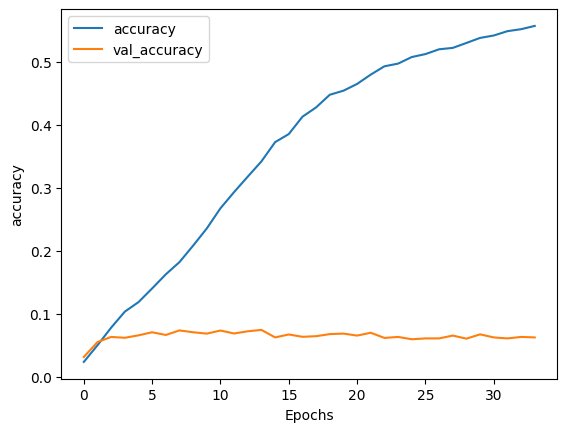

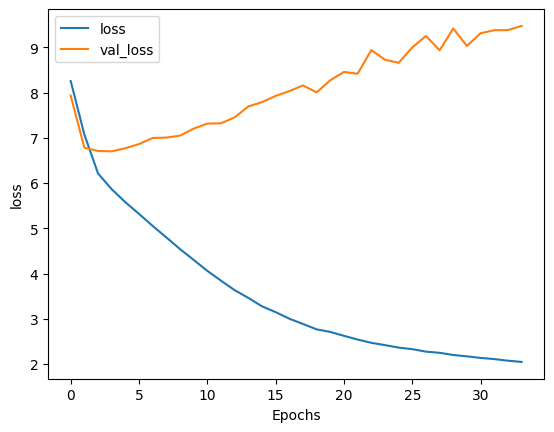

In [51]:
import matplotlib.pyplot as plt
# helper function to plot results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [52]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [55]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_len=gru_model1.input_shape[1]+1
next_word=predict_next_word(gru_model1,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:the


In [57]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=gru_model1.input_shape[1]+1
next_word=predict_next_word(gru_model1,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:of


In [139]:
# Experint with different learning rates

In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define a function to train and evaluate the model for different learning rates
def experiment_with_learning_rates(model, X_train, y_train, X_val, y_val, learning_rates, epochs=50, batch_size=64):
    best_model = None
    best_val_loss = float('inf')  # Initialize to a very high value
    results = {}

    # Iterate over different learning rates
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}\n")
        
        # Reinitialize model for each learning rate (to ensure fair comparison)
        model_copy = tf.keras.models.clone_model(model)  # Clone the model architecture
        model_copy.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy']
        )
        
        # Define callbacks
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
        
        # Train the model
        history = model_copy.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1,
            callbacks=[early_stop, reduce_lr]
        )
        
        # Get the final validation loss
        final_val_loss = min(history.history['val_loss'])
        results[lr] = final_val_loss
        
        # Update best model if this learning rate yields a lower validation loss
        if final_val_loss < best_val_loss:
            best_val_loss = final_val_loss
            best_model = model_copy
    
    return best_model, results




Training with learning rate: 0.001

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.0262 - loss: 7.1974 - val_accuracy: 0.0340 - val_loss: 6.7349 - learning_rate: 0.0010
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.0331 - loss: 6.4541 - val_accuracy: 0.0429 - val_loss: 6.8846 - learning_rate: 0.0010
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.0418 - loss: 6.3423 - val_accuracy: 0.0441 - val_loss: 6.8874 - learning_rate: 0.0010
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.0484 - loss: 6.2289 - val_accuracy: 0.0478 - val_loss: 6.9226 - learning_rate: 0.0010
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.0496 - loss: 6.1312 - val_accuracy: 0.0468 - val_loss: 6.9400 - learning_rate: 0.0010
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.0526 - loss: 6.0243 - val_accuracy: 0.0468 - val_loss: 6.9715 - learning_rate: 0.0010

Training with learning rate: 0.0005

E

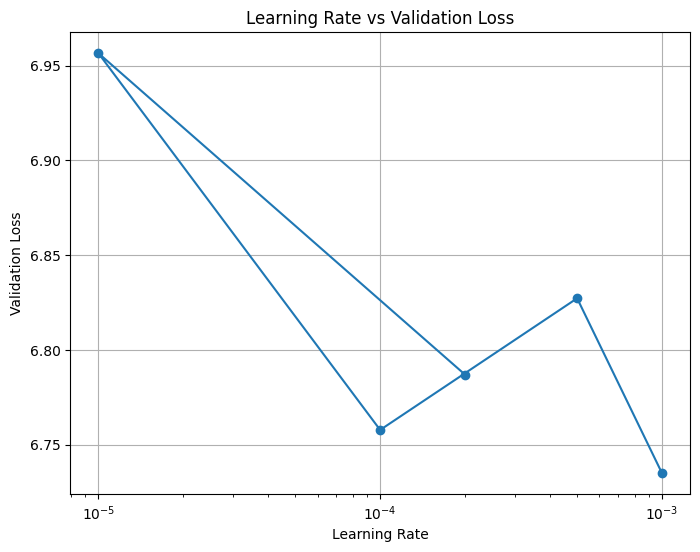

In [60]:
# Define your model
gru_model2 = Sequential()
gru_model2.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
gru_model2.add(LSTM(128, return_sequences=True))
gru_model2.add(Dropout(0.2))
gru_model2.add(LSTM(128))
gru_model2.add(Dense(total_words, activation='softmax'))

# Experiment with different learning rates
learning_rates = [0.001, 0.0005, 0.0001, 0.00001, 0.0002]
best_model, results = experiment_with_learning_rates(gru_model2, X_train, y_train, X_test, y_test, learning_rates)

# Print and visualize the results
print("\nLearning Rate Results:")
for lr, val_loss in results.items():
    print(f"Learning Rate: {lr}, Validation Loss: {val_loss}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.title("Learning Rate vs Validation Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Loss")
plt.xscale("log")  # Learning rates are often better visualized on a log scale
plt.grid(True)
plt.show()
